In [2]:
!pip show geopandas

Name: geopandas
Version: 0.14.2
Summary: Geographic pandas extensions
Home-page: 
Author: 
Author-email: Kelsey Jordahl <kjordahl@alum.mit.edu>
License: BSD 3-Clause
Location: C:\Users\Mahli\anaconda3\envs\ICTE\Lib\site-packages
Requires: fiona, packaging, pandas, pyproj, shapely
Required-by: 


In [65]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("https://github.com/Halabbi/introgeodf/raw/refs/heads/main/MAPAS/World_Countries/World_Countries.shp"))
cities=gpd.read_file(os.path.join("https://github.com/Halabbi/introgeodf/raw/refs/heads/main/MAPAS/World_Countries/World_Countries.shp"))
rivers=gpd.read_file(os.path.join("https://github.com/Halabbi/introgeodf/raw/refs/heads/main/MAPAS/World_Hydrography/World_Hydrography.shp"))


In [66]:
rusia=countries[countries.COUNTRY=='Russia']

In [67]:
rusia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
rusia.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [69]:
rusia.crs.is_projected

False

In [70]:
rusia.centroid

C:\Users\Mahli\AppData\Local\Temp\ipykernel_12424\2175394953.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rusia.centroid


188    POINT (96.69193 61.98838)
dtype: geometry

In [71]:
rusia.to_crs(3576).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=south, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=south, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [72]:
rusia.to_crs( 3576 ).centroid

188    POINT (252364.618 -2535548.113)
dtype: geometry

<Axes: >

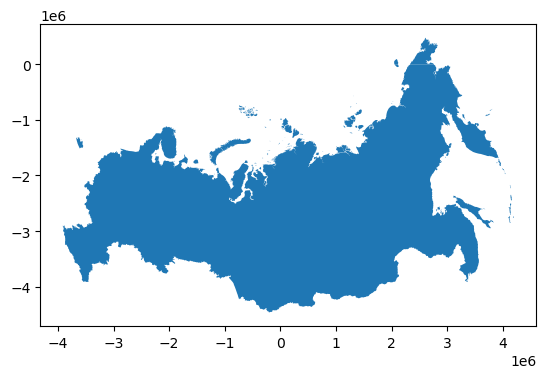

In [73]:
base3576=rusia.to_crs(3576).plot()
rusia.to_crs(3576).centroid.plot(color='red',ax=base5641)

In [74]:
cities_rusia_3576=cities[cities.COUNTRY=='Russia'].to_crs(3576)

In [75]:
riversRussia_clipped=gpd.clip(rivers,rusia)

In [76]:
Russia_3576=rusia.to_crs(3576)

rivers_Russia_3576=riversRussia_clipped.to_crs(rusia.crs)

In [81]:

Russia_3576.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='country', driver="GPKG")
cities_rusia_3576.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='cities', driver="GPKG")
rivers_Russia_3576.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='rivers', driver="GPKG")

DataSourceError: sqlite3_open(maps\brazilMaps_5641.gpkg) failed: unable to open database file